1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

%matplotlib inline

Number of global minimas : 2
Global minima:  -1.0316068351442849
with x :  0.09005098255472378
and y:  -0.7142857142857143

Global minima 2:  -1.0316068351442849
with x :  -0.0900509809968341
and y:  0.7142857142857142

initial guess f(0,0) : 0.0 so not a global minima


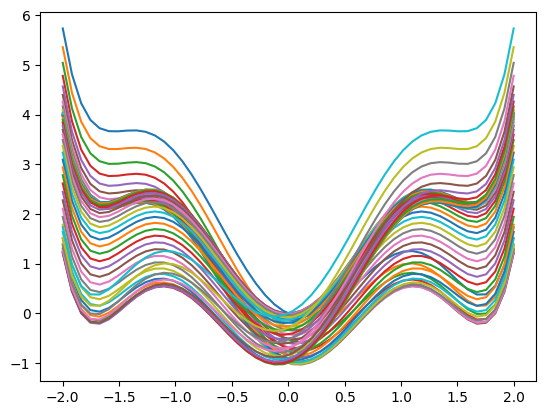

In [66]:
def f(x,y):
    return ((4 - (2.1*(x**2))+((x**4)/3))*x**2 )+ x*y + (4*y**2 - 4)*(y**2)


x = np.linspace(-2, 2, 50)
y = np.linspace(-1, 1, 50)
xv, yv = np.meshgrid(x, y)
solution = []
solution_x = []
y_val = 100
x_val = 100
min_value = 100
count = 0
for i in range(len(y)):
    plt.plot(x, f(x,y[i]))
    solution.append(optimize.minimize_scalar(f,args=(y[i],)).fun)
    solution_x.append(optimize.minimize_scalar(f,args=(y[i],)).x)
    
    
for i in range(len(solution)): #to find first global minima
    if solution[i] < min_value :
        y_val = y[i]
        x_val = solution_x[i]
        min_value = solution[i]
        
for i in range(len(solution)): #to find number of global minima
    if solution[i] == min_value:
        count +=1
        y_val2 = y[i]
        x_val2 = solution_x[i]
        min_value2 = solution[i]

print("Number of global minimas :" ,count)

print("Global minima: ", min_value)
print("with x : ", x_val)
print("and y: ", y_val)

print("\nGlobal minima 2: ", min_value2)
print("with x : ", x_val2)
print("and y: ", y_val2)

print("\ninitial guess f(0,0) :" ,f(0,0) ,"so not a global minima")



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

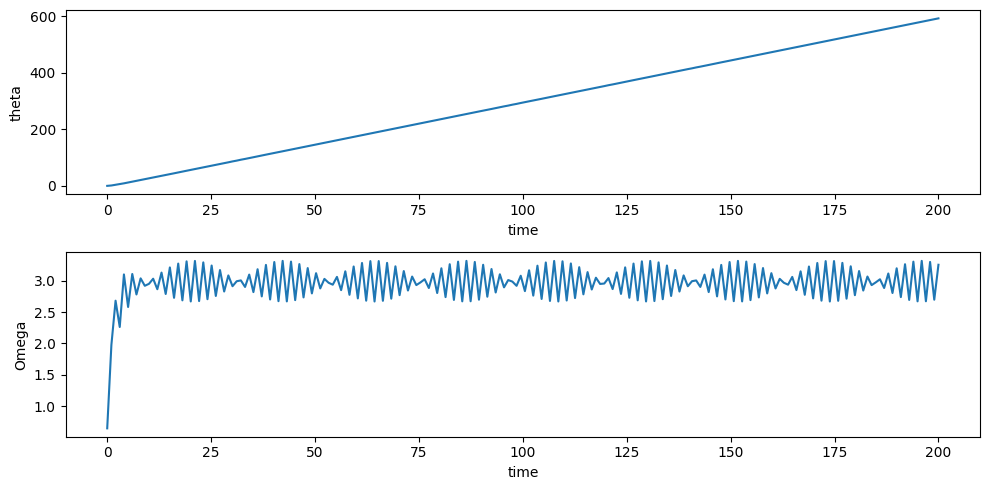

In [70]:
def model(z, t, Q, g, l, d, omega):
    theta, omega = z
    dzdt = [omega, -1/Q * omega + g/l * np.sin(theta) + d * np.cos(Omega * t)]
    return dzdt



z0 = [0.0, 0.65]
t = np.linspace(0, 200, 200)
sol = odeint(model, z0, t, args=(2.0, 9.8, 10.0, 1.5, 0.0))

theta, omega = sol.T


plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, theta)
plt.xlabel('time')
plt.ylabel('theta')

plt.subplot(2, 1, 2)
plt.plot(t, omega)
plt.xlabel('time')
plt.ylabel('Omega')

plt.tight_layout()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

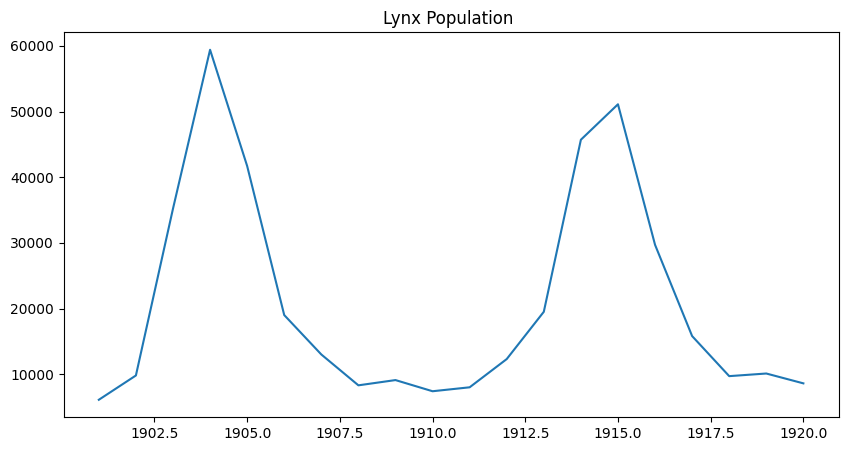

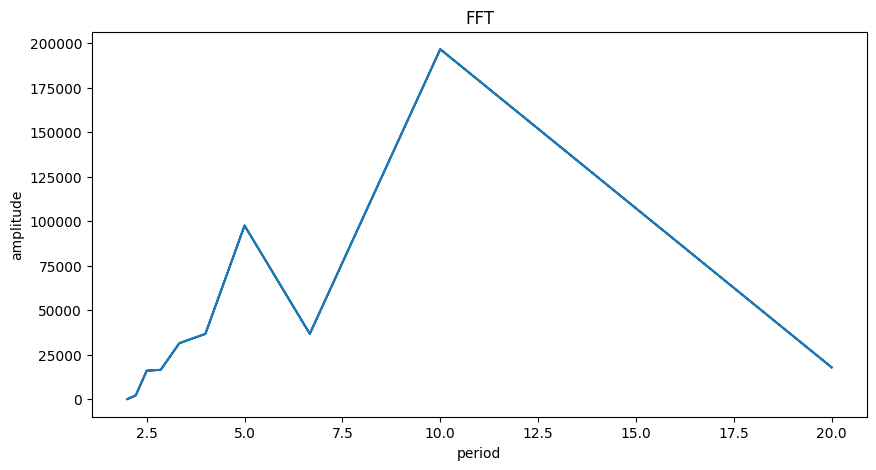

period: 10.0  years


In [99]:
from scipy.fft import fft

df = pd.read_csv('data/populations.txt', sep='\t', skiprows=1)
df.columns = ['Year', 'Hare', 'Lynx', 'Carrot'] # i had to delete first row and put it again

years = df['Year']
lynx_population = df['Lynx'].to_numpy()
plt.figure(figsize=(10, 5))
plt.plot(years, lynx_population)
plt.title('Lynx Population ')
plt.show()


N = len(lynx_population)
dt = years.iloc[1] - years.iloc[0]  


fft_result = fft(lynx_population)
frequencies = np.fft.fftfreq(N, dt)
positive_frequencies = frequencies[1:] #no didivions by 0
positive_fft_result = fft_result[1:]


periods = np.abs(1 / positive_frequencies)

threshold = 1000 
fft_result_filtered = np.where(np.abs(positive_fft_result) > threshold, positive_fft_result, 0)

plt.figure(figsize=(10, 5))
plt.plot(periods[:len(fft_result_filtered)], np.abs(fft_result_filtered))
plt.title('FFT')
plt.xlabel('period')
plt.ylabel('amplitude')
plt.show()


max_amplitude_index = np.argmax(np.abs(fft_result_filtered)) #frequence = max of fft graph
period = 1/positive_frequencies[max_amplitude_index]
print("period:", period," years")



4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

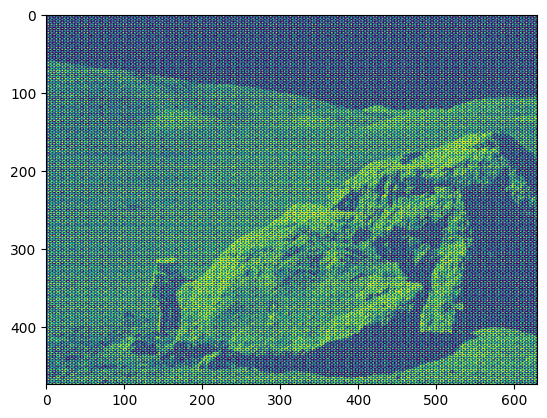

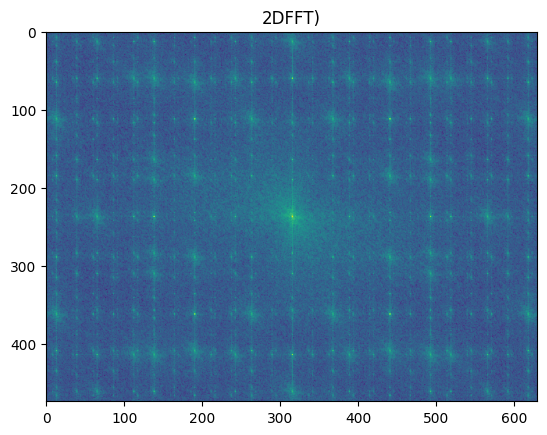

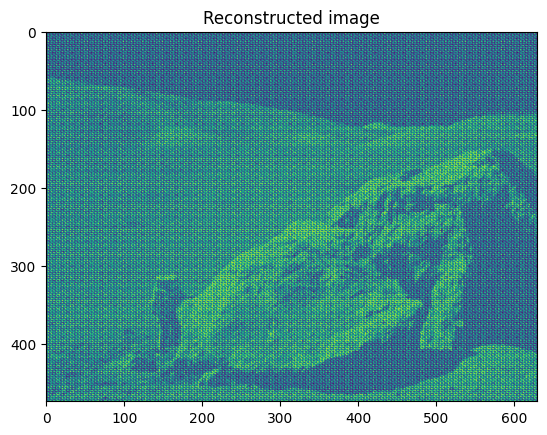

The result is very mitigated, as we can see a little difference


In [129]:
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2, fftshift

image_array = plt.imread("data/moonlanding.png")
plt.imshow(image_array)
plt.show()


image_fft = fft2(image_array)
image_fft_shifted = fftshift(image_fft)
plt.imshow(np.abs(image_fft_shifted), norm=LogNorm(vmin=1))
plt.title("2DFFT)")
plt.show()


image_fft_shifted[50:150, 100:200] = 0 
image_reconstructed = ifft2(fftshift(image_fft_shifted)).real

plt.imshow(image_reconstructed)
plt.title("Reconstructed image")
plt.show()

print("The result is very mitigated, as we can see a little difference")
